<h1>Import Necessary Libraries for Data Preprocessing</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Read and Display the Data</h2>

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
df.shape

(9709, 20)

<h2>Data Pre-processing</h2>

<h3>Missing Value</h3>

In [4]:
df.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

<h3>Duplicated Value</h3>

In [5]:
df.duplicated().sum()

0

<h3>Data Information</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [7]:
df.nunique()

ID                 9709
Gender                2
Own_car               2
Own_property          2
Work_phone            2
Phone                 2
Email                 2
Unemployed            2
Num_children          9
Num_family           10
Account_length       61
Total_income        263
Age                7172
Years_employed     3637
Income_type           5
Education_type        5
Family_status         5
Housing_type          6
Occupation_type      19
Target                2
dtype: int64

<h3>Column Remove</h3>

In [8]:
df = df.drop('ID',axis=1)

<h3>Data Visualization and Exploration</h3>

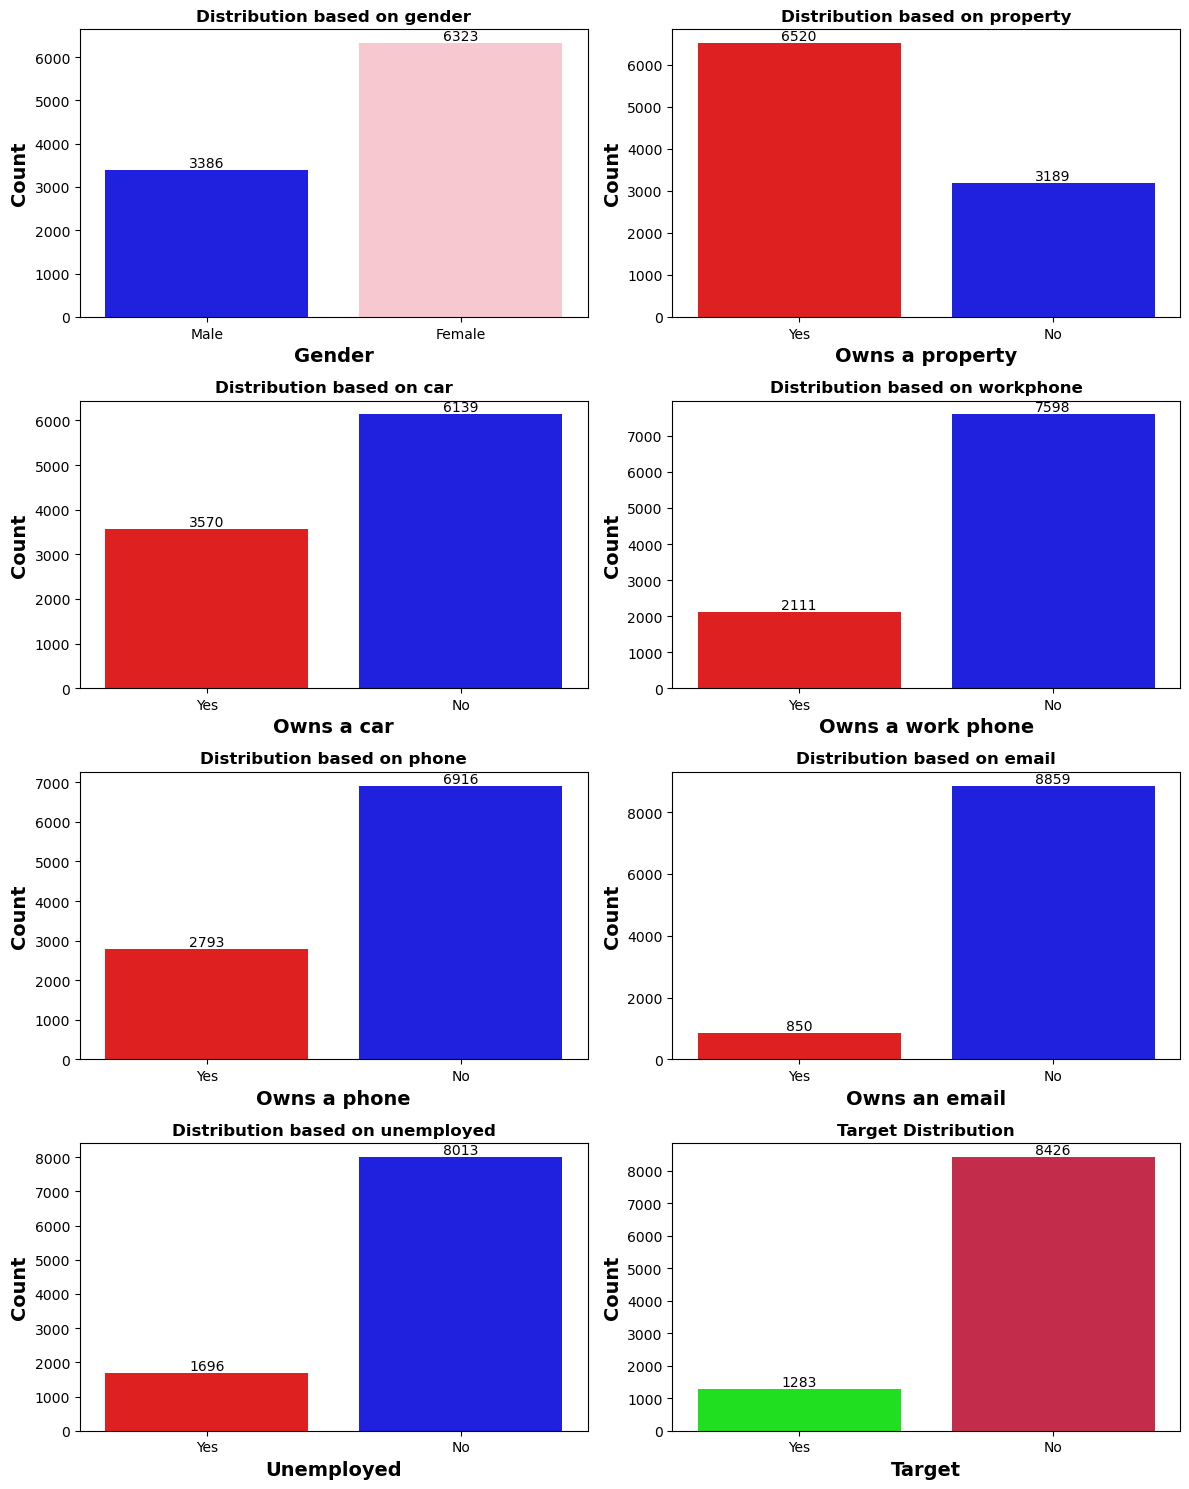

In [9]:
# Data
male_count = df['Gender'].value_counts()[1]
female_count = df['Gender'].value_counts()[0]
property_yes = df['Own_property'].value_counts()[1]
property_no = df['Own_property'].value_counts()[0]
car_yes = df['Own_car'].value_counts()[1]
car_no = df['Own_car'].value_counts()[0]
work_phone_yes = df['Work_phone'].value_counts()[1]
work_phone_no = df['Work_phone'].value_counts()[0]
phone_yes = df['Phone'].value_counts()[1]
phone_no = df['Phone'].value_counts()[0]
email_yes = df['Email'].value_counts()[1]
email_no = df['Email'].value_counts()[0]
unemployed_yes = df['Unemployed'].value_counts()[1]
unemployed_no = df['Unemployed'].value_counts()[0]
target_eligible = df['Target'].value_counts()[1]
target_not_eligible = df['Target'].value_counts()[0]

# Subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Gender distribution
sns.barplot(ax=axes[0, 0], x=['Male', 'Female'], y=[male_count, female_count], palette=['blue', 'pink'])
axes[0, 0].set_xlabel('Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[0, 0].set_title('Distribution based on gender', fontweight='bold')
for index, value in enumerate([male_count, female_count]):
    axes[0, 0].text(index, value + 5, str(value), ha='center', va='bottom')

# Property distribution
sns.barplot(ax=axes[0, 1], x=['Yes', 'No'], y=[property_yes, property_no], palette=['Red', 'Blue'])
axes[0, 1].set_xlabel('Owns a property', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[0, 1].set_title('Distribution based on property', fontweight='bold')
for index, value in enumerate([property_yes, property_no]):
    axes[0, 1].text(index, value, str(value), ha='center', va='bottom')

# Car distribution
sns.barplot(ax=axes[1, 0], x=['Yes', 'No'], y=[car_yes, car_no], palette=['Red', 'Blue'])
axes[1, 0].set_xlabel('Owns a car', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[1, 0].set_title('Distribution based on car', fontweight='bold')
for index, value in enumerate([car_yes, car_no]):
    axes[1, 0].text(index, value, str(value), ha='center', va='bottom')

# Work Phone distribution
sns.barplot(ax=axes[1, 1], x=['Yes', 'No'], y=[work_phone_yes, work_phone_no], palette=['Red', 'Blue'])
axes[1, 1].set_xlabel('Owns a work phone', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[1, 1].set_title('Distribution based on workphone', fontweight='bold')
for index, value in enumerate([work_phone_yes, work_phone_no]):
    axes[1, 1].text(index, value, str(value), ha='center', va='bottom')

# Phone distribution
sns.barplot(ax=axes[2, 0], x=['Yes', 'No'], y=[phone_yes, phone_no], palette=['Red', 'Blue'])
axes[2, 0].set_xlabel('Owns a phone', fontsize=14, fontweight='bold')
axes[2, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[2, 0].set_title('Distribution based on phone', fontweight='bold')
for index, value in enumerate([phone_yes, phone_no]):
    axes[2, 0].text(index, value, str(value), ha='center', va='bottom')

# Email distribution
sns.barplot(ax=axes[2, 1], x=['Yes', 'No'], y=[email_yes, email_no], palette=['Red', 'Blue'])
axes[2, 1].set_xlabel('Owns an email', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[2, 1].set_title('Distribution based on email', fontweight='bold')
for index, value in enumerate([email_yes, email_no]):
    axes[2, 1].text(index, value, str(value), ha='center', va='bottom')

# Unemployed distribution
sns.barplot(ax=axes[3, 0], x=['Yes', 'No'], y=[unemployed_yes, unemployed_no], palette=['Red', 'Blue'])
axes[3, 0].set_xlabel('Unemployed', fontsize=14, fontweight='bold')
axes[3, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[3, 0].set_title('Distribution based on unemployed', fontweight='bold')
for index, value in enumerate([unemployed_yes, unemployed_no]):
    axes[3, 0].text(index, value, str(value), ha='center', va='bottom')

# Target distribution
sns.barplot(ax=axes[3, 1], x=['Yes', 'No'], y=[target_eligible, target_not_eligible], palette=['Lime', 'Crimson'])
axes[3, 1].set_xlabel('Target', fontsize=14, fontweight='bold')
axes[3, 1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[3, 1].set_title('Target Distribution', fontweight='bold')
for index, value in enumerate([target_eligible, target_not_eligible]):
    axes[3, 1].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show();

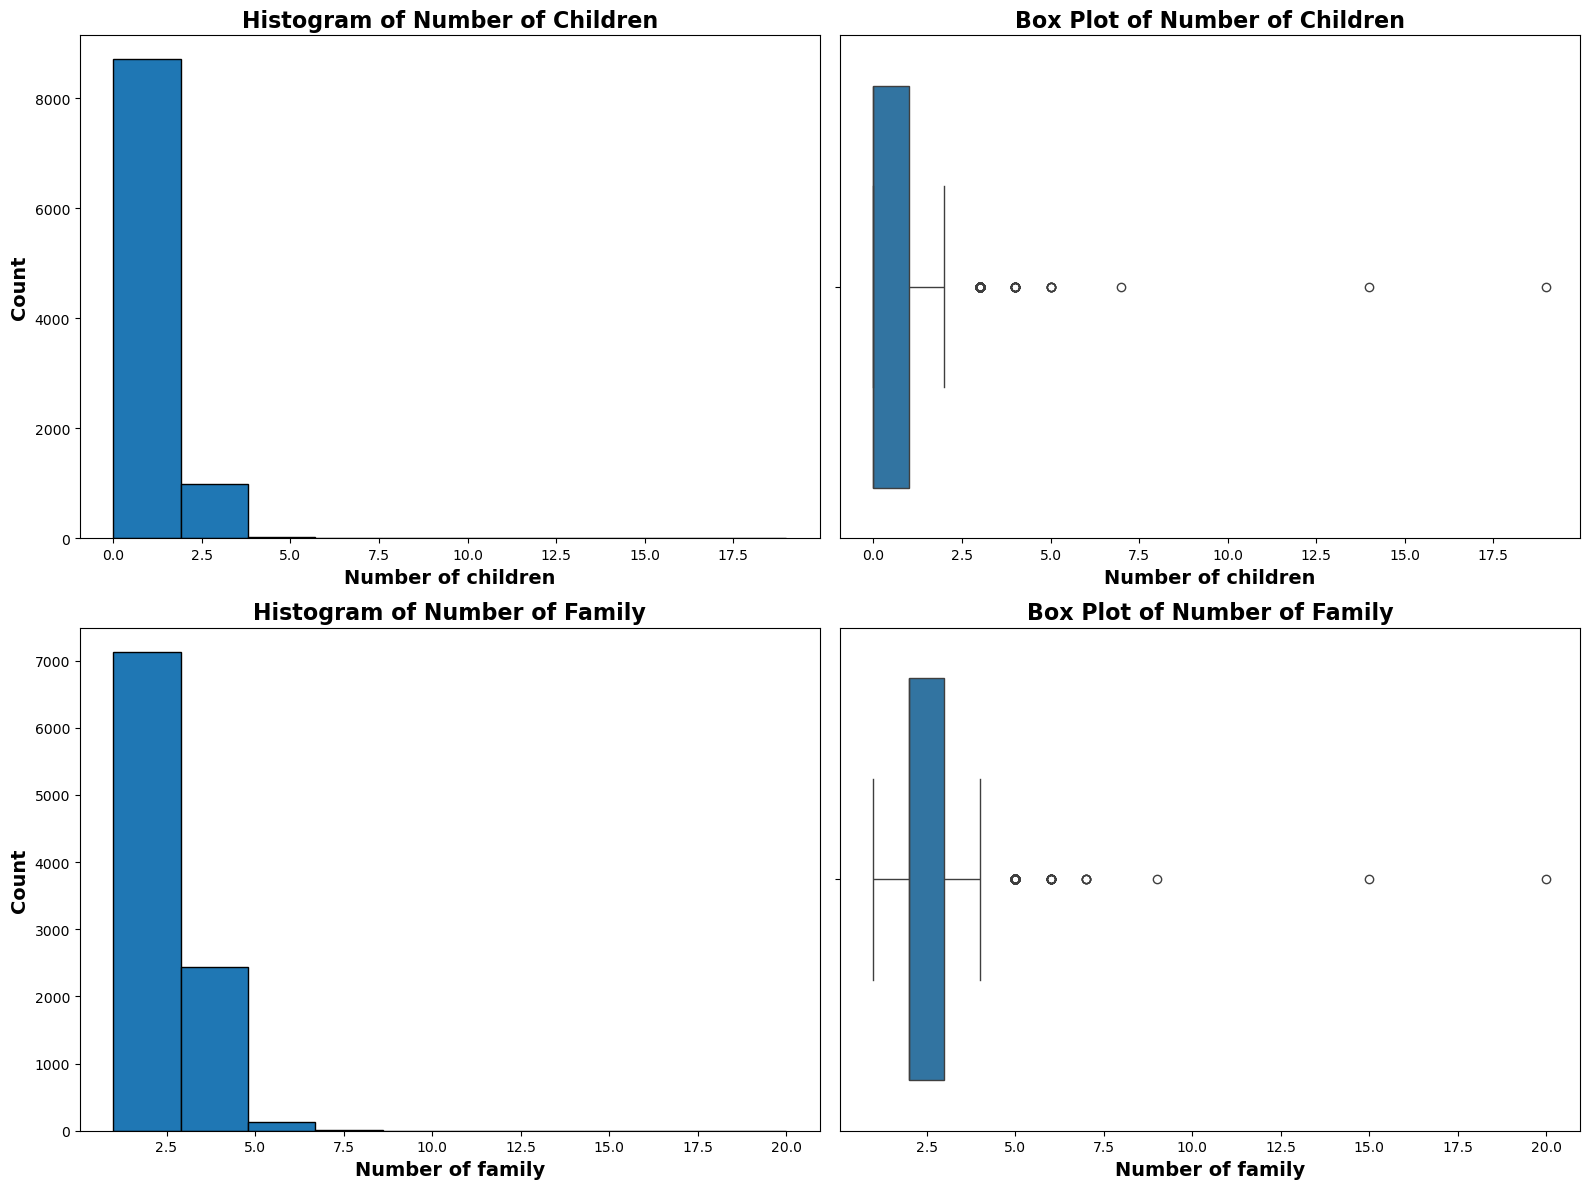

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Number of Children
axes[0, 0].hist(df['Num_children'], edgecolor='black')
axes[0, 0].set_xlabel('Number of children', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[0, 0].set_title('Histogram of Number of Children', fontsize=16, fontweight='bold')

# Box Plot of Number of Children
sns.boxplot(ax=axes[0, 1], x=df['Num_children'])
axes[0, 1].set_xlabel('Number of children', fontsize=14, fontweight='bold')
axes[0, 1].set_title('Box Plot of Number of Children', fontsize=16, fontweight='bold')

# Histogram of Number of Family
axes[1, 0].hist(df['Num_family'], edgecolor='black')
axes[1, 0].set_xlabel('Number of family', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[1, 0].set_title('Histogram of Number of Family', fontsize=16, fontweight='bold')

# Box Plot of Number of Family
sns.boxplot(ax=axes[1, 1], x=df['Num_family'])
axes[1, 1].set_xlabel('Number of family', fontsize=14, fontweight='bold')
axes[1, 1].set_title('Box Plot of Number of Family', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show();

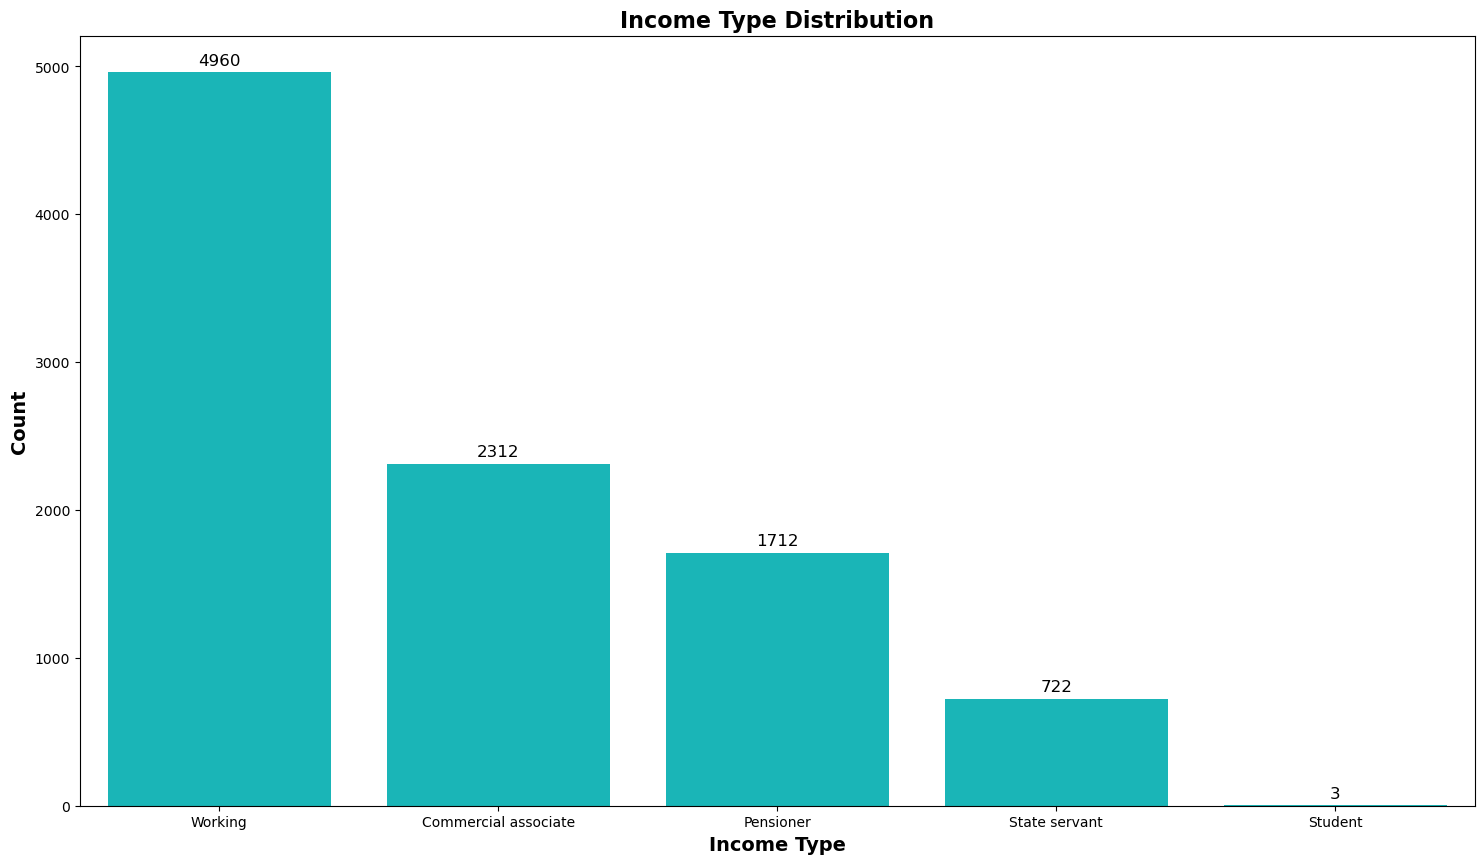

In [11]:
total_counts = df['Income_type'].value_counts().reset_index()
total_counts.columns = ['Income_type', 'Count']

plt.figure(figsize=(18, 10))
barplot = sns.barplot(x='Income_type', y='Count', data=total_counts, color='DarkTurquoise')

for index, row in total_counts.iterrows():
    barplot.annotate(f"{row['Count']}", 
                     xy=(index, row['Count']), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', 
                     fontsize=12)

plt.xlabel('Income Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Income Type Distribution', fontsize=16, fontweight='bold')
plt.show();

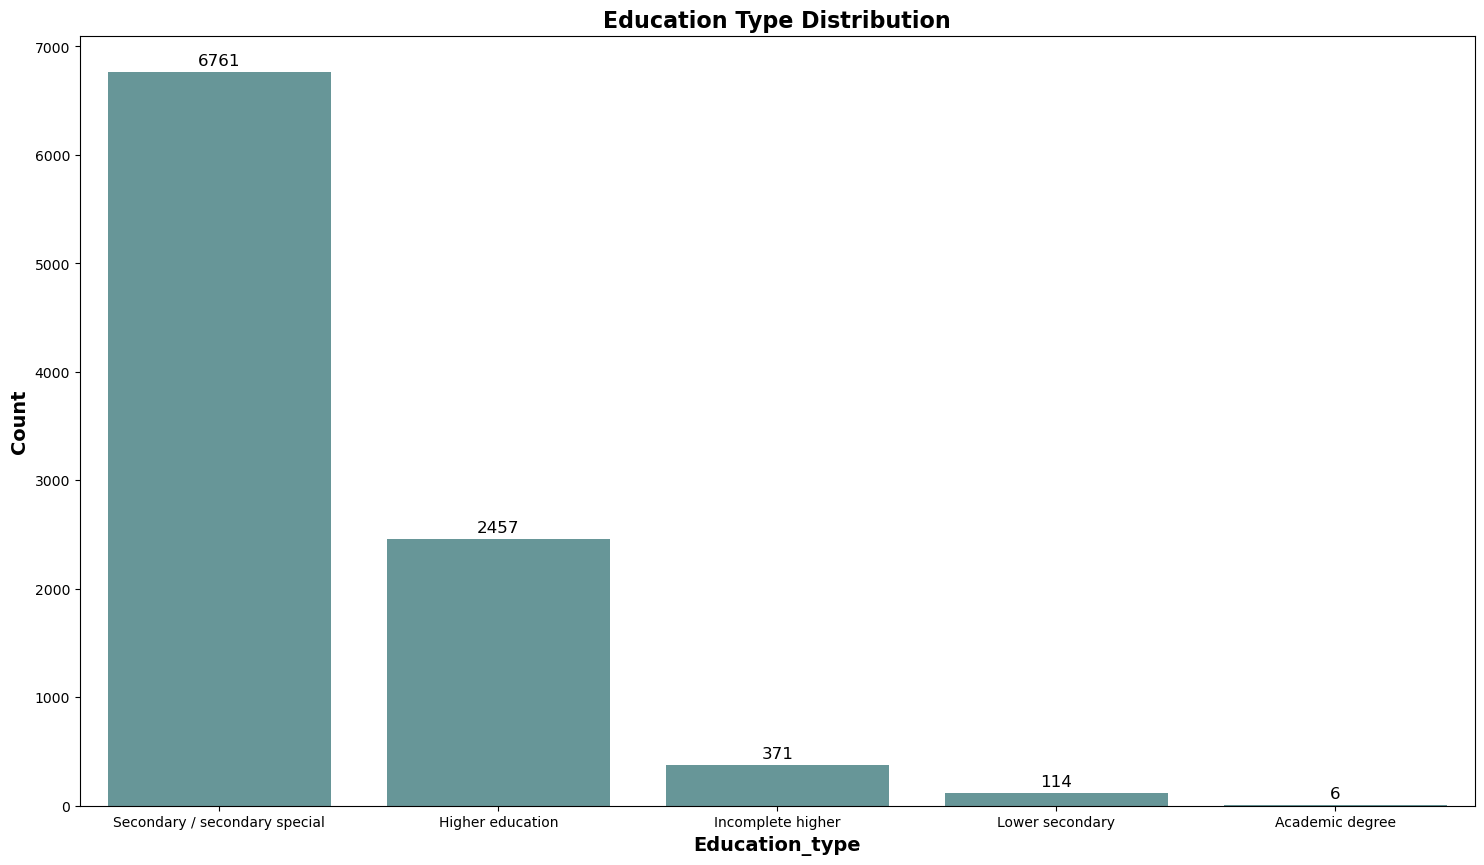

In [12]:
total_counts = df['Education_type'].value_counts().reset_index()
total_counts.columns = ['Education_type', 'Count']

plt.figure(figsize=(18, 10))
barplot = sns.barplot(x='Education_type', y='Count', data=total_counts, color='CadetBlue')

for index, row in total_counts.iterrows():
    barplot.annotate(f"{row['Count']}", 
                     xy=(index, row['Count']), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', 
                     fontsize=12)

plt.xlabel('Education_type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Education Type Distribution', fontsize=16, fontweight='bold')
plt.show();

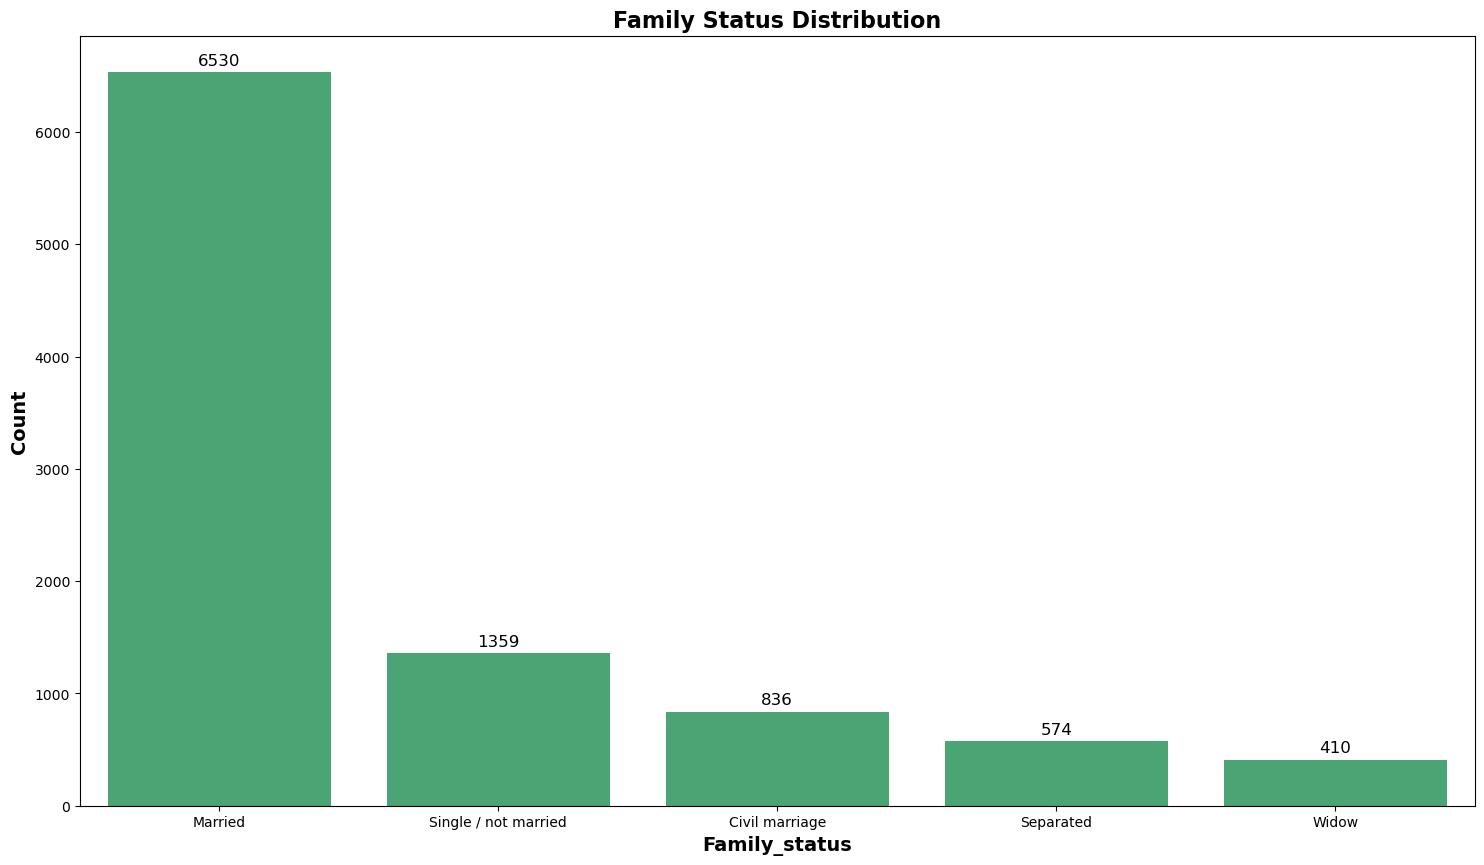

In [13]:
total_counts = df['Family_status'].value_counts().reset_index()
total_counts.columns = ['Family_status', 'Count']

plt.figure(figsize=(18, 10))
barplot = sns.barplot(x='Family_status', y='Count', data=total_counts, color='MediumSeaGreen')

for index, row in total_counts.iterrows():
    barplot.annotate(f"{row['Count']}", 
                     xy=(index, row['Count']), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', 
                     fontsize=12)

plt.xlabel('Family_status', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Family Status Distribution', fontsize=16, fontweight='bold')
plt.show();

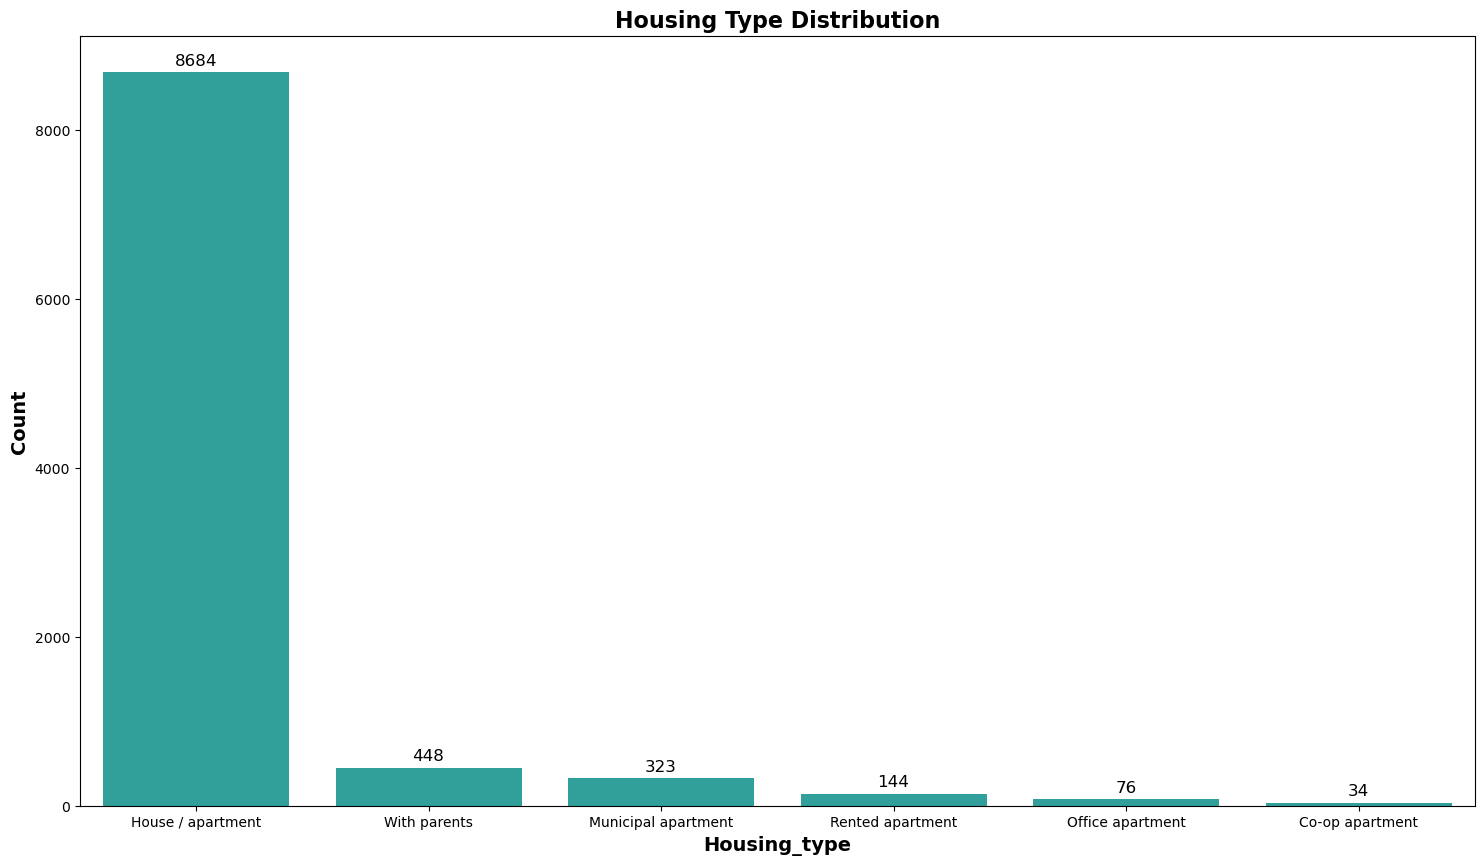

In [14]:
total_counts = df['Housing_type'].value_counts().reset_index()
total_counts.columns = ['Housing_type', 'Count']

plt.figure(figsize=(18, 10))
barplot = sns.barplot(x='Housing_type', y='Count', data=total_counts, color='LightSeaGreen')

for index, row in total_counts.iterrows():
    barplot.annotate(f"{row['Count']}", 
                     xy=(index, row['Count']), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', 
                     fontsize=12)

plt.xlabel('Housing_type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Housing Type Distribution', fontsize=16, fontweight='bold')
plt.show();

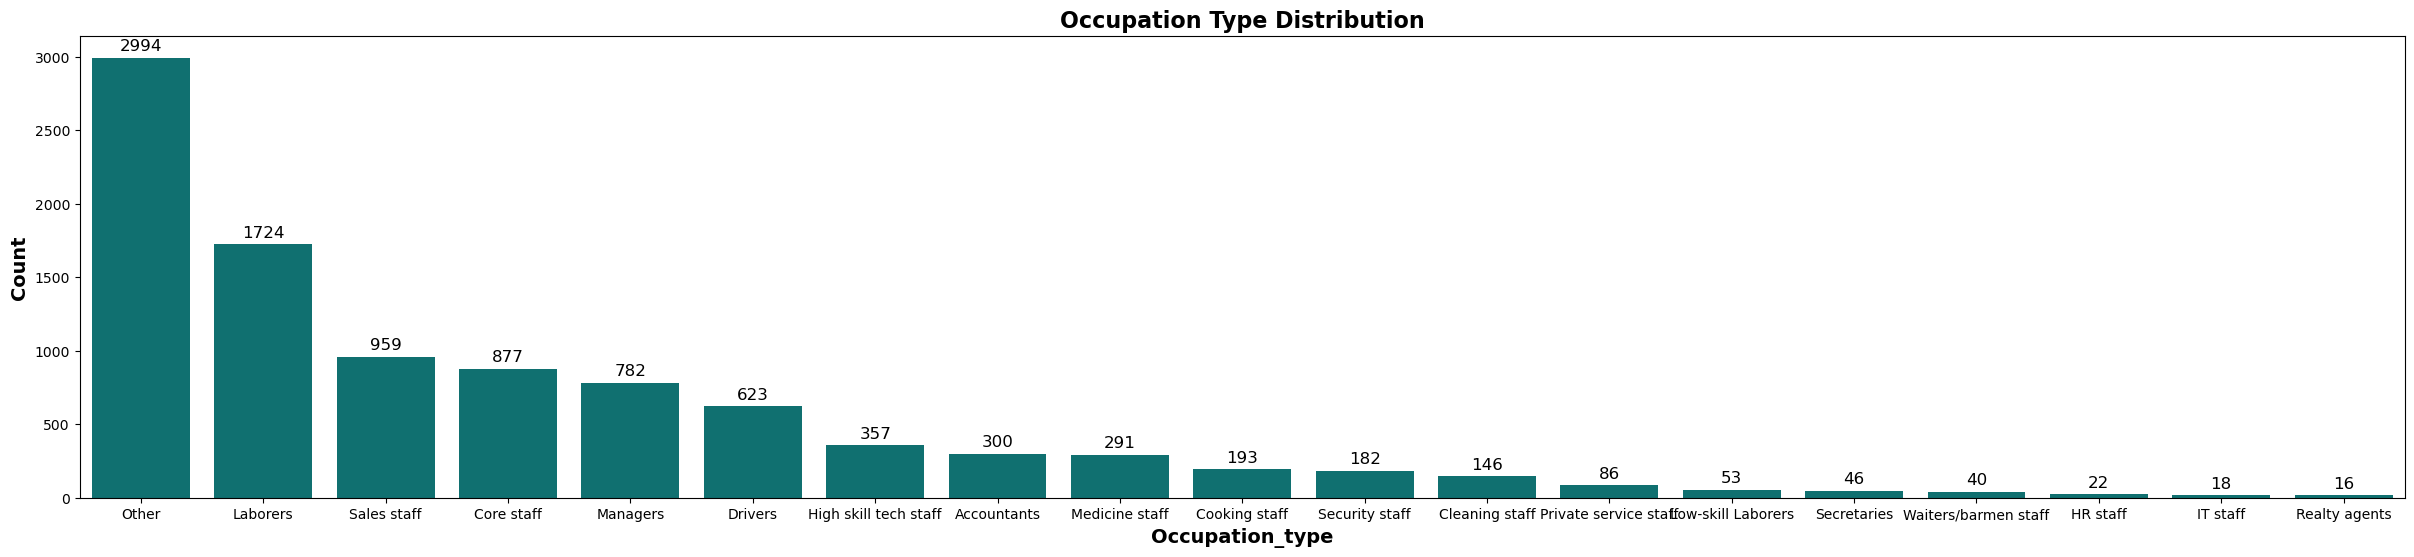

In [15]:
total_counts = df['Occupation_type'].value_counts().reset_index()
total_counts.columns = ['Occupation_type', 'Count']

plt.figure(figsize=(30, 6))
barplot = sns.barplot(x='Occupation_type', y='Count', data=total_counts, color='Teal')

for index, row in total_counts.iterrows():
    barplot.annotate(f"{row['Count']}", 
                     xy=(index, row['Count']), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', 
                     fontsize=12)

plt.xlabel('Occupation_type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Occupation Type Distribution', fontsize=16, fontweight='bold')
plt.show();

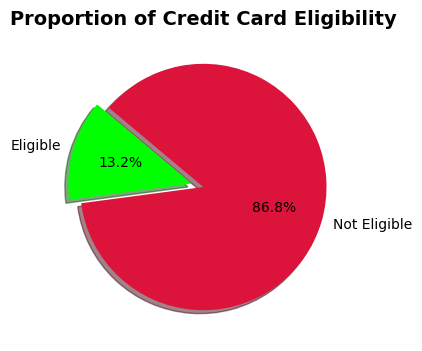

In [16]:
target_eligible = df['Target'].value_counts()[1]/df.shape[0]
target_not_eligible = df['Target'].value_counts()[0]/df.shape[0]

labels = ['Eligible', 'Not Eligible']
sizes = [target_eligible, target_not_eligible]
colors = ['Lime', 'Crimson']
explode = (0.1, 0)  

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Credit Card Eligibility', fontsize=14, fontweight='bold')
plt.show();

<h3>Noisy Data Checking</h3>

In [17]:
df.describe()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [18]:
df[df['Account_length'] > df['Age']]

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
7,0,0,1,0,1,0,0,0,2,31,157500.0,27.463945,4.021985,Working,Secondary / secondary special,Married,House / apartment,Laborers,1
8,0,0,1,0,0,0,0,1,2,44,112500.0,30.029364,4.435409,Working,Secondary / secondary special,Single / not married,House / apartment,Other,0
10,1,0,1,0,0,0,0,1,3,39,405000.0,32.422295,5.519621,Commercial associate,Higher education,Married,House / apartment,Managers,0
19,0,0,0,0,1,0,0,0,2,43,157500.0,37.350527,13.267897,Commercial associate,Higher education,Married,House / apartment,High skill tech staff,1
21,1,0,1,0,0,0,0,1,3,45,225000.0,28.257938,7.688043,Working,Secondary / secondary special,Married,House / apartment,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,1,1,0,1,0,0,0,2,4,44,225000.0,38.703053,7.195220,Working,Secondary / secondary special,Single / not married,House / apartment,Managers,1
9685,1,0,1,0,0,0,0,0,1,47,270000.0,28.446854,2.179374,Working,Higher education,Single / not married,House / apartment,Sales staff,1
9689,0,0,1,0,0,0,0,2,3,36,270000.0,28.542681,7.515555,Pensioner,Higher education,Single / not married,House / apartment,Core staff,1
9698,1,0,0,1,1,0,0,1,3,34,180000.0,29.175137,2.535302,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1


In [19]:
mean_Account_length = df['Account_length'].mean()
mean_Account_length

27.270058708414872

In [20]:
df['Account_length'] = df.apply(
    lambda row: mean_Account_length
    if row['Account_length'] > row['Age'] else row['Account_length'], 
    axis=1
)

In [21]:
df[df['Account_length'] > df['Age']]

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
57,0,0,0,1,1,0,0,0,2,27.270059,135000.0,26.439968,4.271135,Working,Secondary / secondary special,Civil marriage,House / apartment,Managers,0
92,1,1,0,1,0,0,0,1,3,27.270059,135000.0,25.818463,3.271799,Working,Secondary / secondary special,Married,House / apartment,Sales staff,0
101,1,0,0,1,0,0,0,0,1,27.270059,108000.0,22.401555,3.605824,Working,Secondary / secondary special,Single / not married,Co-op apartment,Cooking staff,1
114,0,0,0,0,0,0,0,2,4,27.270059,135000.0,26.656263,7.857793,Working,Secondary / secondary special,Married,House / apartment,Other,0
155,1,0,0,1,1,0,0,0,1,27.270059,180000.0,25.681568,4.690035,Working,Secondary / secondary special,Single / not married,House / apartment,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423,1,1,0,0,1,1,0,1,3,27.270059,450000.0,26.960170,1.374429,Working,Higher education,Married,House / apartment,Core staff,1
9432,1,0,0,0,1,0,0,0,2,27.270059,225000.0,25.769181,2.625653,Commercial associate,Higher education,Married,With parents,IT staff,1
9531,0,0,1,0,0,1,0,1,3,27.270059,90000.0,26.119633,2.625653,Working,Secondary / secondary special,Married,House / apartment,Laborers,1
9550,0,1,1,0,0,0,0,0,1,27.270059,54000.0,23.619924,4.208163,State servant,Secondary / secondary special,Single / not married,House / apartment,Medicine staff,0


In [22]:
df = df[~(df['Account_length'] > df['Age'])]

In [23]:
df[df['Years_employed'] > df['Age']]

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target


<h3>Column Rename</h3>

In [24]:
df['Family_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [25]:
df.rename(columns={'Family_status': 'Marital_status'}, inplace=True)

In [26]:
df['Occupation_type'].unique()

array(['Other', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [27]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Marital_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15.0,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29.0,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4.0,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20.0,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5.0,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


<h3>Check for Outliers</h3>

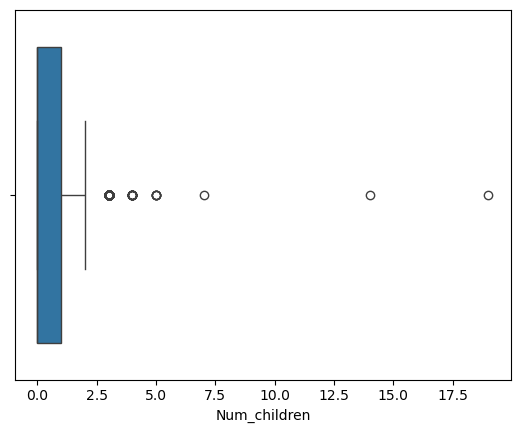

In [28]:
sns.boxplot(x=df['Num_children'])
plt.show()

In [29]:
def outlier(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(lower_bound, upper_bound)

In [30]:
outlier('Num_children')

-1.5 2.5


In [31]:
df = df[df['Num_children']<=3]

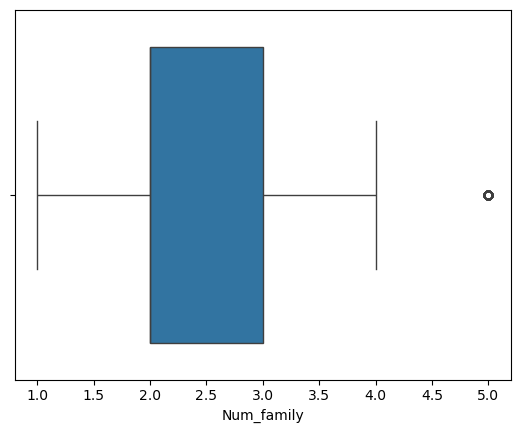

In [32]:
sns.boxplot(x=df['Num_family'])
plt.show()

In [33]:
outlier('Num_family')

0.5 4.5


In [34]:
df = df[(df['Num_family']>=1.0) & (df['Num_family']<=5)]

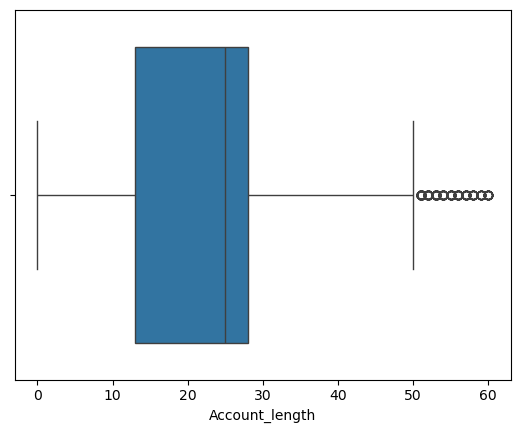

In [35]:
sns.boxplot(x=df['Account_length'])
plt.show()

In [36]:
outlier('Account_length')

-9.5 50.5


In [37]:
df = df[(df['Account_length']<=50.5)]

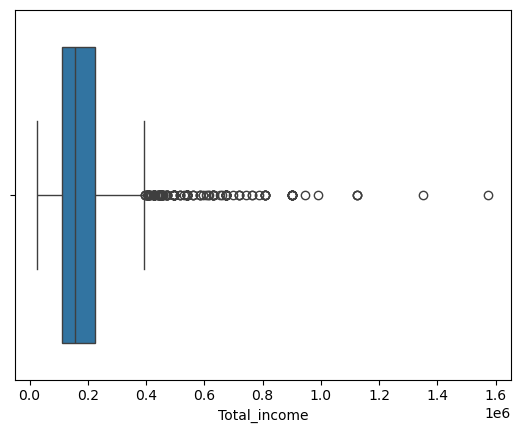

In [38]:
sns.boxplot(x=df['Total_income'])
plt.show()

In [39]:
outlier('Total_income')

-56250.0 393750.0


In [40]:
df = df[(df['Total_income']<=393750.0)]

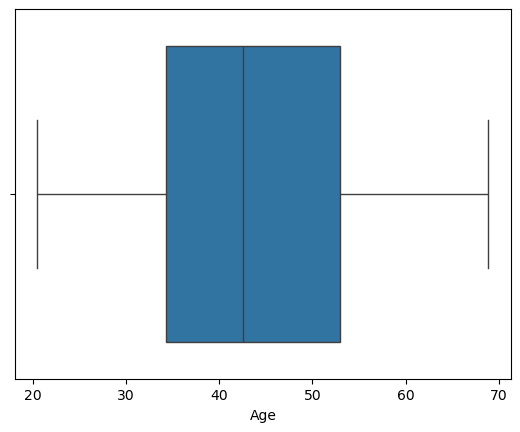

In [41]:
sns.boxplot(x=df['Age'])
plt.show()

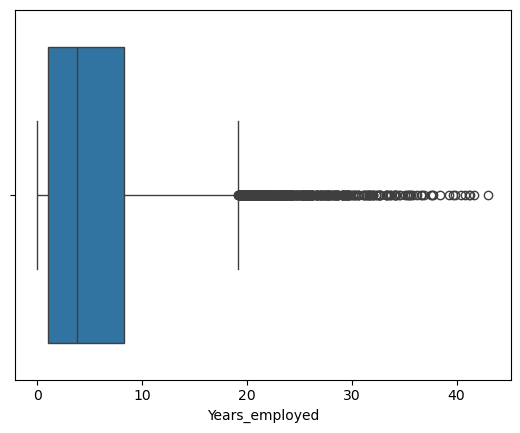

In [42]:
sns.boxplot(x=df['Years_employed'])
plt.show()

In [43]:
outlier('Years_employed')

-9.913961272305386 19.173562769940517


In [44]:
df = df[df['Years_employed']<=19.173562769940517]

In [45]:
# Check if 'Student' is in the 'Income_type' column and 'Unemployed' is 1
student_unemployed = df[(df['Income_type'] == 'Student') & (df['Unemployed'] == 1)]

# Print the result
if not student_unemployed.empty:
    print("The data includes students who are unemployed.")
else:
    print("The data does not include students who are unemployed.")
student_unemployed

The data does not include students who are unemployed.


,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Marital_status,Housing_type,Occupation_type,Target


In [46]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Marital_status,Housing_type,Occupation_type,Target
1,1,1,1,0,0,0,0,0,2,29.0,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4.0,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20.0,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5.0,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,1,1,1,0,0,0,0,0,2,17.0,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0


In [47]:
df.shape

(8491, 19)

<h3>Feature Engineering</h3>

In [48]:
df['Income_to_Children_Ratio'] = np.where(df['Num_children'] > 0, 
                                          df['Total_income'] / df['Num_children'], 
                                          0)  # Assign 0 or another value if Num_children is 0


df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Marital_status,Housing_type,Occupation_type,Target,Income_to_Children_Ratio
1,1,1,1,0,0,0,0,0,2,29.0,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,0.0
2,0,0,1,0,1,1,0,0,1,4.0,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0.0
3,0,0,1,0,0,0,1,0,1,20.0,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0,0.0
4,1,1,1,1,1,1,0,0,2,5.0,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0,0.0
5,1,1,1,0,0,0,0,0,2,17.0,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0,0.0


In [49]:
df['Family_size_ratio'] = df['Num_children'] / df['Num_family']

In [50]:
df['Family_size_ratio'].unique()

array([0.        , 0.5       , 0.6       , 0.33333333, 0.66666667,
       0.75      , 2.        , 1.        ])

In [51]:
df.shape

(8491, 21)

In [52]:
df.duplicated().sum()

0

In [53]:
df.isna().sum()

Gender                      0
Own_car                     0
Own_property                0
Work_phone                  0
Phone                       0
Email                       0
Unemployed                  0
Num_children                0
Num_family                  0
Account_length              0
Total_income                0
Age                         0
Years_employed              0
Income_type                 0
Education_type              0
Marital_status              0
Housing_type                0
Occupation_type             0
Target                      0
Income_to_Children_Ratio    0
Family_size_ratio           0
dtype: int64

<h3>Encoding Categorical Data</h3>

In [54]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[['Income_type', 'Education_type', 'Marital_status', 'Housing_type', 'Occupation_type']])

encoded_columns = encoder.get_feature_names_out(['Income_type', 'Education_type', 'Marital_status', 'Housing_type', 'Occupation_type'])

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

df = df.drop(['Income_type', 'Education_type', 'Marital_status', 'Housing_type', 'Occupation_type'], axis=1)

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1,1,1,0,0,0,0,0,2,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,1,0,1,1,0,0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,1,0,0,0,1,0,1,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,1,0,0,2,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,0,0,0,0,0,2,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8486,0,0,0,0,0,0,0,0,2,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8487,0,0,1,1,1,0,0,0,2,19.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8488,1,1,1,0,0,0,0,0,2,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8489,0,0,1,0,1,1,0,0,2,32.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.shape

(8491, 56)

In [56]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Target',
       'Income_to_Children_Ratio', 'Family_size_ratio',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Student',
       'Income_type_Working', 'Education_type_Academic degree',
       'Education_type_Higher education', 'Education_type_Incomplete higher',
       'Education_type_Lower secondary',
       'Education_type_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_Wi

<h3>Features Selection</h3>

Selected Features based on Pearson Correlation (Positive and Negative):
['Gender', 'Own_property', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Age', 'Family_size_ratio', 'Income_type_Pensioner', 'Income_type_Student', 'Education_type_Incomplete higher', 'Education_type_Secondary / secondary special', 'Marital_status_Civil marriage', 'Marital_status_Married', 'Marital_status_Separated', 'Marital_status_Single / not married', 'Marital_status_Widow', 'Housing_type_House / apartment', 'Housing_type_Rented apartment', 'Occupation_type_Core staff', 'Occupation_type_HR staff', 'Occupation_type_Low-skill Laborers', 'Occupation_type_Other', 'Occupation_type_Sales staff', 'Occupation_type_Security staff']


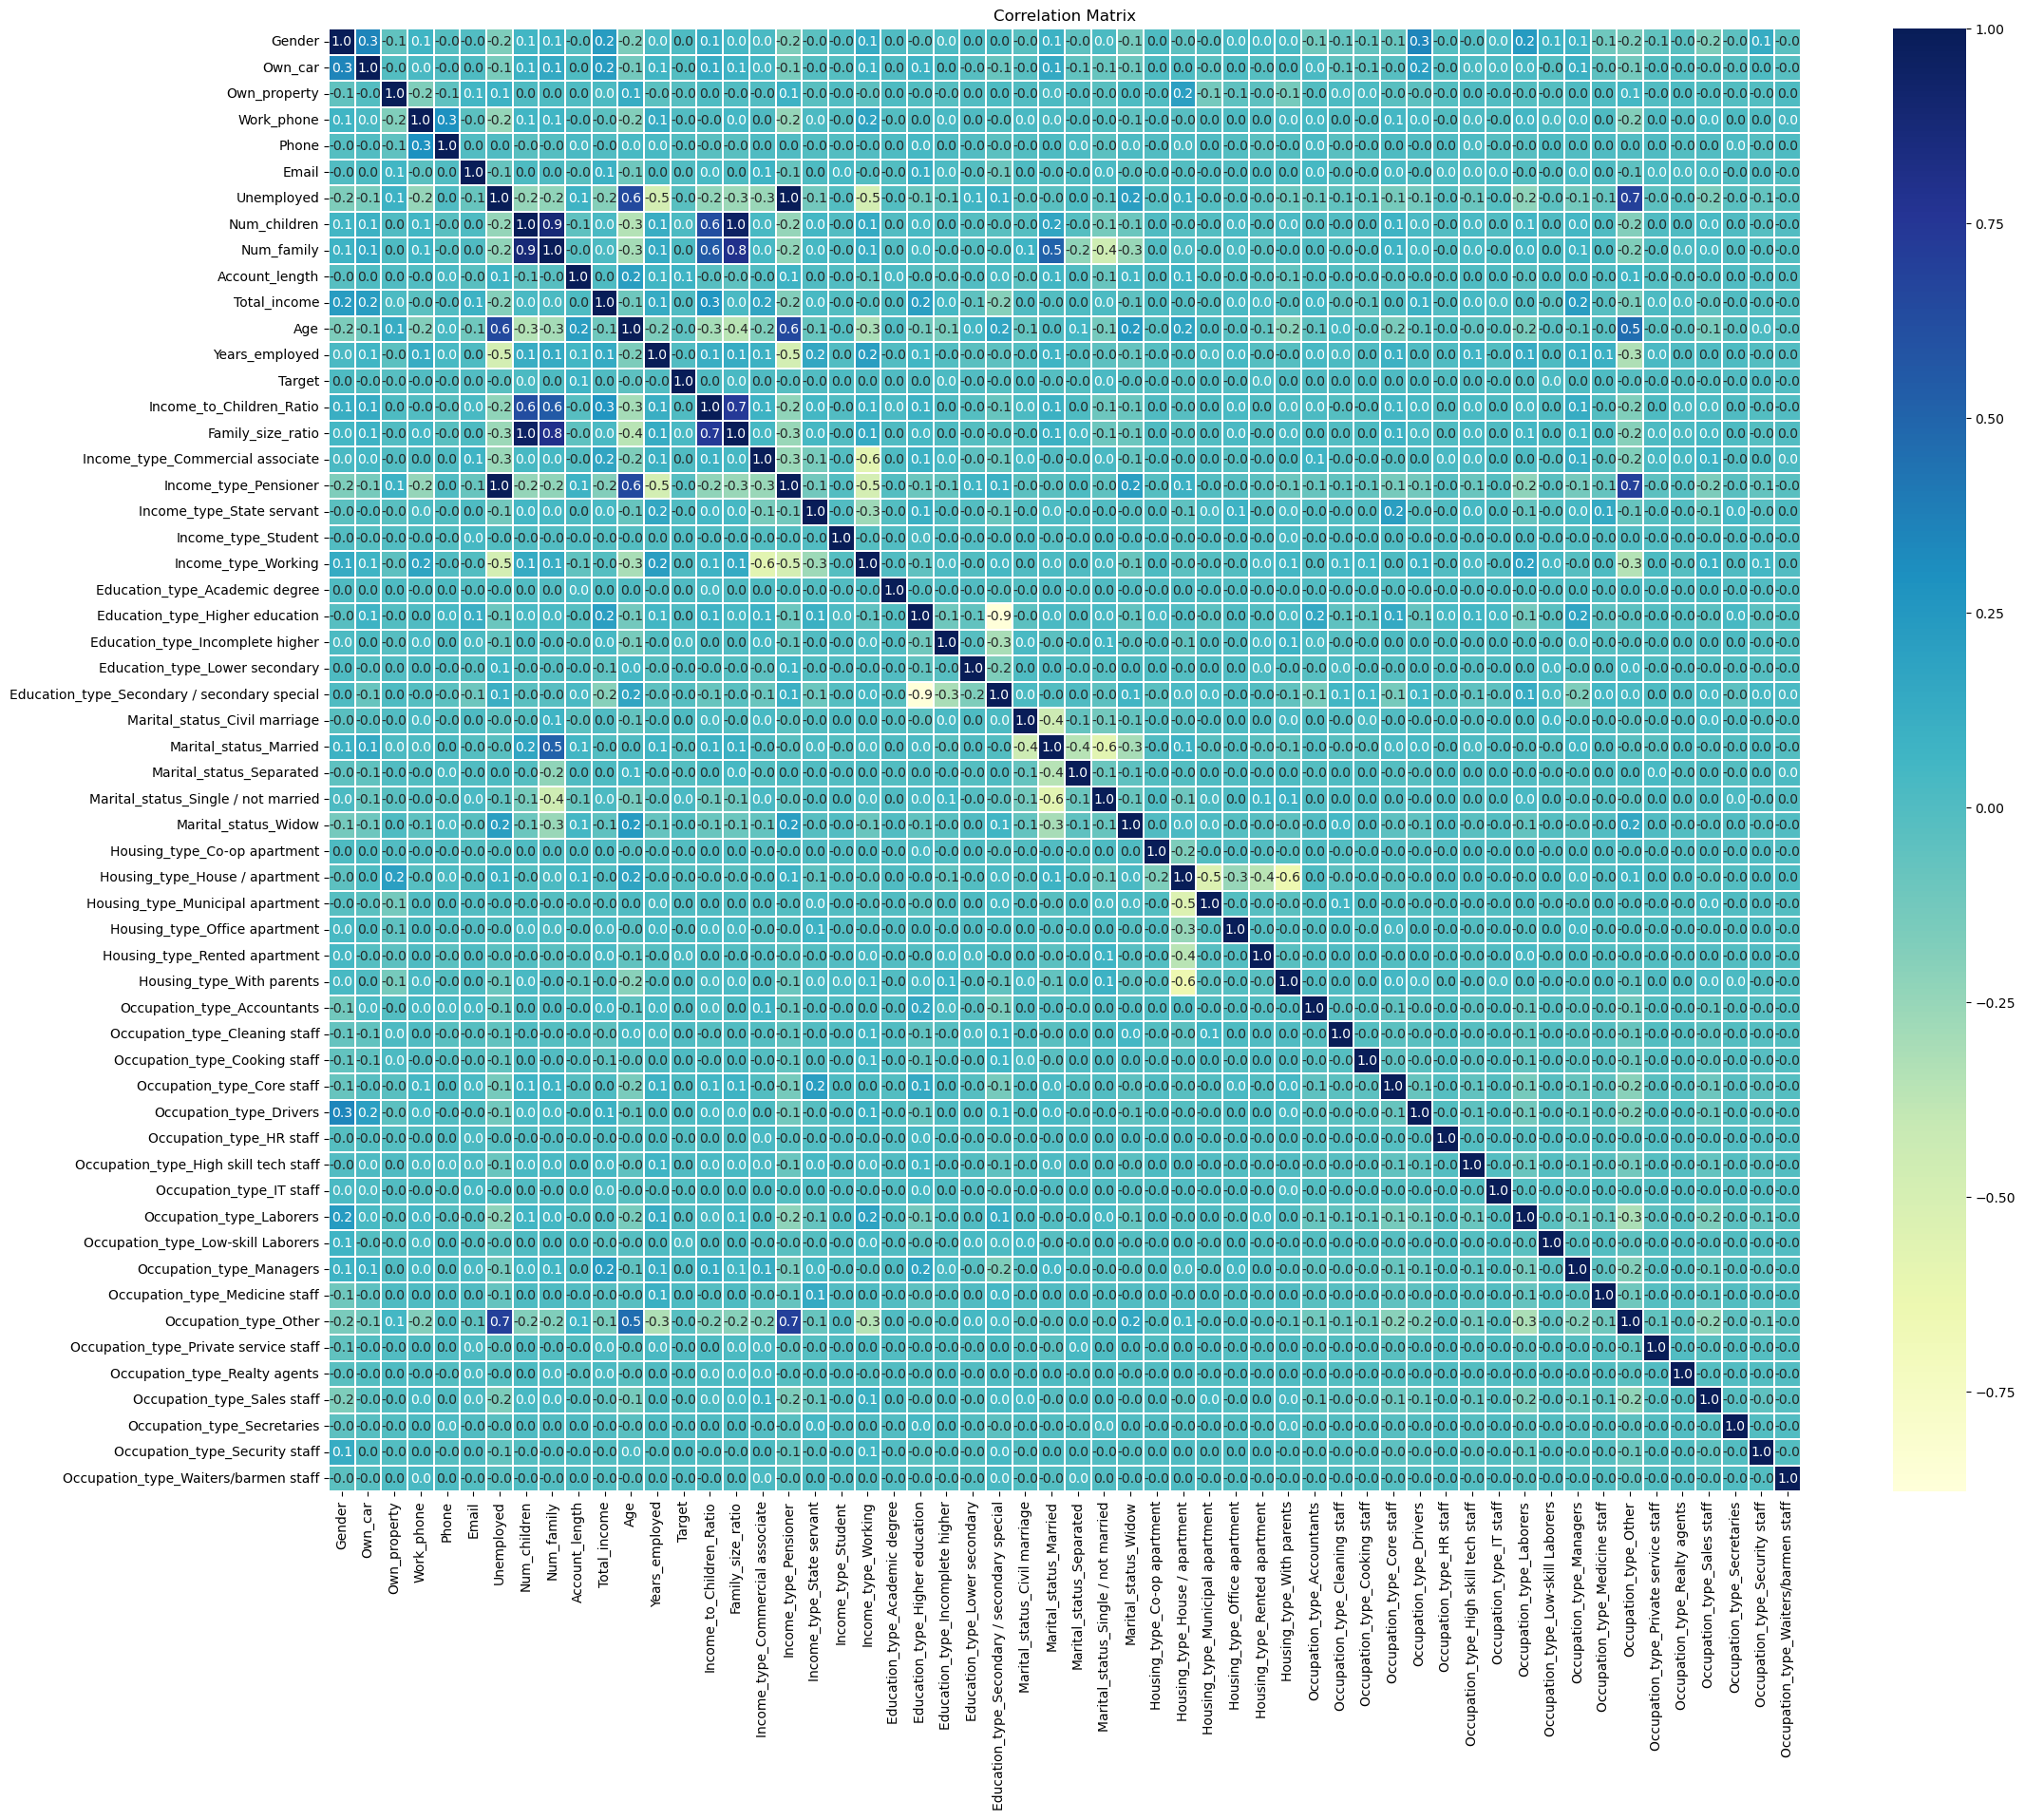

In [57]:
correlation_matrix = df.corr(numeric_only=True)

target_correlation = correlation_matrix['Target'].drop('Target') 

positive_threshold = 0.01
negative_threshold = -0.01

selected_features = target_correlation[(target_correlation > positive_threshold) | (target_correlation < negative_threshold)].index.tolist()

print("Selected Features based on Pearson Correlation (Positive and Negative):")
print(selected_features)

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(correlation_matrix, fmt=".1f", linewidth=0.3, cmap="YlGnBu", annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()


In [58]:
selected_df = df[selected_features]

final_df = selected_df  
final_df['Target'] = df['Target']  

final_df.head()

,Gender,Own_property,Unemployed,Num_children,Num_family,Account_length,Age,Family_size_ratio,Income_type_Pensioner,Income_type_Student,...,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Rented apartment,Occupation_type_Core staff,Occupation_type_HR staff,Occupation_type_Low-skill Laborers,Occupation_type_Other,Occupation_type_Sales staff,Occupation_type_Security staff,Target
0,1,1,0,0,2,29.0,58.793815,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0,1,0,0,1,4.0,52.321403,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,1,1,0,1,20.0,61.504343,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1,1,0,0,2,5.0,46.193967,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,1,0,0,2,17.0,48.674511,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
final_df.shape

(8491, 26)

In [60]:
X = final_df.drop(columns=['Target'])
y = final_df['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<h3>Class Balancing</h3>

In [61]:
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTEN

smtn = SMOTE(sampling_strategy='minority',random_state=42)
# smtn = SMOTEN(random_state=42)
X_train_resampled, y_train_resampled = smtn.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_resampled, columns=['Target'])

X_test = pd.DataFrame(X_test, columns=X_test.columns)
X_val = pd.DataFrame(X_val, columns=X_val.columns)

y_train['Target'].value_counts()

Target
0    4739
1    4739
Name: count, dtype: int64

<h3>Normalization</h3>

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        
X_val = scaler.transform(X_val)

<h1>Model Building</h1>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

<h2>Logistic Regression</h2>

In [64]:
clf_LR = LogisticRegression(random_state=42,max_iter=1000)

clf_LR.fit(X_train, y_train)

print("Accuracy for Logistic Regression Training Set:", clf_LR.score(X_train, y_train))

Accuracy for Logistic Regression Training Set: 0.6856931842160794


In [65]:
y_preds = clf_LR.predict(X_test)

In [66]:
print("Classification Report for Logistic Regression Test Set:")
print(classification_report(y_test, y_preds))

Classification Report for Logistic Regression Test Set:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1473
           1       0.16      0.33      0.21       226

    accuracy                           0.67      1699
   macro avg       0.52      0.53      0.50      1699
weighted avg       0.78      0.67      0.72      1699



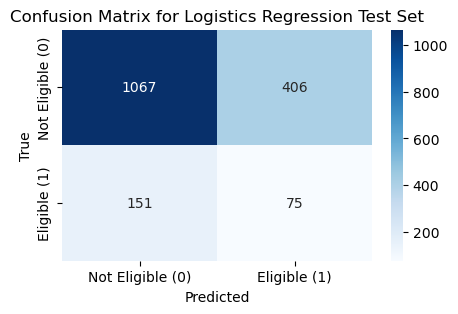

In [67]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistics Regression Test Set')
plt.show()

In [68]:
print("Accuracy for Logistic Regression Test Set:", accuracy_score(y_test, y_preds))

Accuracy for Logistic Regression Test Set: 0.672160094173043


In [69]:
LR_params= {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
           'C': np.logspace(-4, 4, 20),
           'solver': ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga'],
           'max_iter': [200,500,800,1000]}

rs_LR = RandomizedSearchCV(clf_LR,
                           param_distributions=LR_params,
                           cv=5,
                           n_iter=100,
                           random_state = 42,
                           n_jobs =-1)

rs_LR.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [200, 500, 800, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42)

In [70]:
print("Best Hyperparameters for Logistic Regression:", rs_LR.best_params_)

Best Hyperparameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 200, 'C': 4.281332398719396}


In [71]:
print("Accuracy for Logistic Regression Test Set Using Best Hyperparameters:", rs_LR.score(X_test, y_test))

Accuracy for Logistic Regression Test Set Using Best Hyperparameters: 0.681577398469688


In [72]:
best_params = rs_LR.best_params_

clf_LR_hp = LogisticRegression(**best_params, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clf_LR_hp, X_train, y_train, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.68987342 0.6814346  0.66350211 0.68565401 0.67088608 0.68670886
 0.67616034 0.6814346  0.7032735  0.71488912]
Mean Accuracy: 0.6853816627235018


In [73]:
clf_LR_hp.fit(X_train, y_train)

y_preds = clf_LR_hp.predict(X_test)
print("Classification Report for Logistic Regression after Tuning:")
print(classification_report(y_test, y_preds))

Classification Report for Logistic Regression after Tuning:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1473
           1       0.16      0.33      0.21       226

    accuracy                           0.68      1699
   macro avg       0.52      0.53      0.51      1699
weighted avg       0.78      0.68      0.72      1699



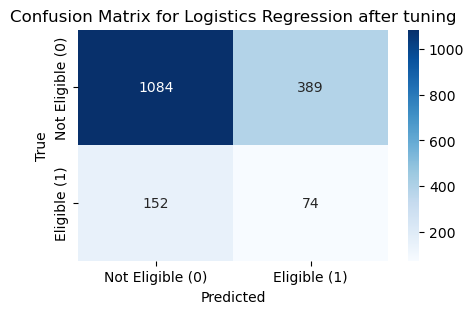

In [74]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistics Regression after tuning')
plt.show()

In [75]:
validation_score = clf_LR_hp.score(X_val, y_val)
print(f'Validation Set Accuracy: {validation_score}')

Validation Set Accuracy: 0.6784400294334069


In [76]:
y_val_preds = clf_LR_hp.predict(X_val)

print("Classification Report for Logistic Regression Validation Set:")
print(classification_report(y_val, y_val_preds))

Classification Report for Logistic Regression Validation Set:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1178
           1       0.16      0.33      0.21       181

    accuracy                           0.68      1359
   macro avg       0.52      0.53      0.51      1359
weighted avg       0.78      0.68      0.72      1359



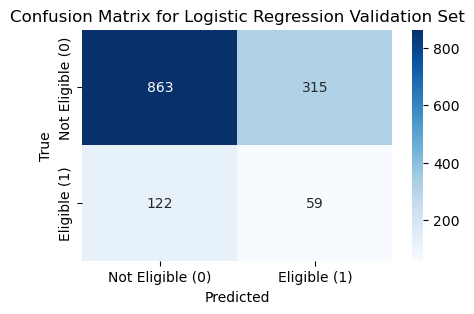

In [77]:
conf_mat = confusion_matrix(y_val, y_val_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression Validation Set')
plt.show()

<h2>Gradient Boosting Classifier (GBC)</h2>

In [78]:
clf_GBC = GradientBoostingClassifier(random_state=42)

clf_GBC.fit(X_train, y_train.values.ravel())

print("Accuracy for GBC Training Set:", clf_GBC.score(X_train, y_train))

Accuracy for GBC Training Set: 0.8748681156362101


In [79]:
y_preds = clf_GBC.predict(X_test)

In [80]:
print("Classification Report for GBC Test Set:")
print(classification_report(y_test, y_preds))

Classification Report for GBC Test Set:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1473
           1       0.29      0.02      0.03       226

    accuracy                           0.86      1699
   macro avg       0.58      0.51      0.48      1699
weighted avg       0.79      0.86      0.81      1699



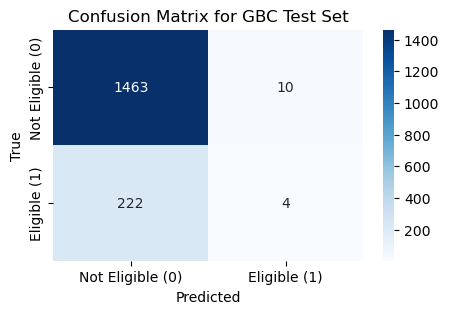

In [81]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GBC Test Set')
plt.show()

In [82]:
print("Accuracy for GBC Test Set:", accuracy_score(y_test, y_preds))

Accuracy for GBC Test Set: 0.8634490876986463


In [83]:
GBC_params = {'n_estimators': [100, 150, 200],
           'max_features': ['auto', 'sqrt', 'log2'],
           'learning_rate': uniform(0.01, 0.3),
           'max_depth': randint(3, 10),
           'min_samples_split': randint(2, 20),
           'min_samples_leaf': randint(1, 20),
           'subsample': uniform(0.5, 1.0),
}

rs_GBC = RandomizedSearchCV(clf_GBC,
                           param_distributions=GBC_params,
                           cv=5,
                           n_iter=100,
                           random_state = 42)

rs_GBC.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F8EECD1CD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F8EED70490>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F8EECEDCD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F8EEE61B10>,
                                        'n_estimators': [100, 150, 200],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F8EECAE890>},
                   random_state=42)

In [84]:
print("Best Hyperparameters for GBC:", rs_GBC.best_params_)

Best Hyperparameters for GBC: {'learning_rate': 0.14124247660711872, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8965427823212702}


In [85]:
print("Accuracy for GBC Test Set Using Best Hyperparameters:", rs_GBC.score(X_test, y_test))

Accuracy for GBC Test Set Using Best Hyperparameters: 0.8457916421424367


In [86]:
clf_GBC = GradientBoostingClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clf_GBC, X_train, y_train, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.86919831 0.86919831 0.87341772 0.88080169 0.8871308  0.87552743
 0.85759494 0.85654008 0.85850053 0.88173178]
Mean Accuracy: 0.8709641595266421


In [87]:
clf_GBC.fit(X_train, y_train)

test_score = clf_GBC.score(X_val, y_val)
print(f'Validation Set Accuracy: {test_score}')

Validation Set Accuracy: 0.8616629874908021


In [88]:
y_val_preds = clf_GBC.predict(X_val)

print("Classification Report for GBC Validation Set:")
print(classification_report(y_val, y_val_preds))

Classification Report for GBC Validation Set:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1178
           1       0.11      0.01      0.01       181

    accuracy                           0.86      1359
   macro avg       0.49      0.50      0.47      1359
weighted avg       0.77      0.86      0.80      1359



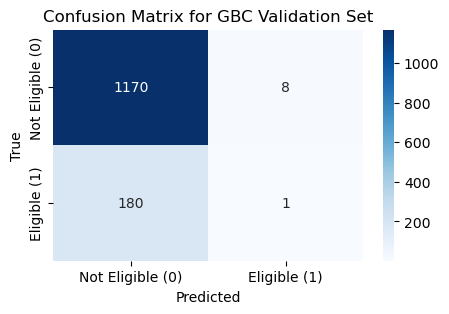

In [89]:
conf_mat = confusion_matrix(y_val, y_val_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GBC Validation Set')
plt.show()

<h2>AdaBoost Classifier</h2>

In [90]:
clf_AB = AdaBoostClassifier(random_state=42)

clf_AB.fit(X_train, y_train.values.ravel())

print("Accuracy for AdaBoost Classifier Training Set:", clf_AB.score(X_train, y_train))

Accuracy for AdaBoost Classifier Training Set: 0.8541886473939649


In [91]:
y_preds = clf_AB.predict(X_test)

In [92]:
print("Classification Report for AdaBoost Classifier Test Set:")
print(classification_report(y_test, y_preds))

Classification Report for AdaBoost Classifier Test Set:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1473
           1       0.18      0.06      0.09       226

    accuracy                           0.84      1699
   macro avg       0.52      0.51      0.50      1699
weighted avg       0.78      0.84      0.80      1699



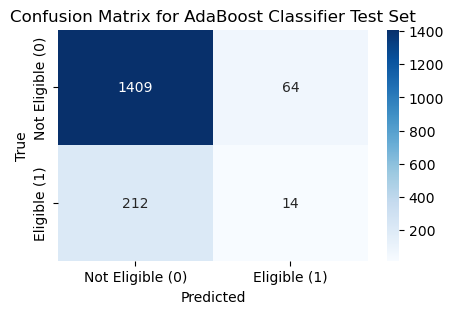

In [93]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for AdaBoost Classifier Test Set')
plt.show()

In [94]:
print("Accuracy for AdaBoost Classifier Test Set:", accuracy_score(y_test, y_preds)) 

Accuracy for AdaBoost Classifier Test Set: 0.8375515008828722


In [95]:
AB_params = {'n_estimators': [50, 100, 200],
             'learning_rate': [0.01, 0.1, 1.0],
             'algorithm': ['SAMME', 'SAMME.R'], 
}

rs_AB = RandomizedSearchCV(clf_AB,
                           param_distributions=AB_params,
                           cv=5,
                           n_iter=100,
                           random_state = 42)

rs_AB.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [96]:
print("Best Hyperparameters for AdaBosst Classifier:", rs_AB.best_params_) 

Best Hyperparameters for AdaBosst Classifier: {'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}


In [97]:
print("Accuracy for AdaBosst Classifier Test Set Using Best Hyperparameters:", rs_AB.score(X_test, y_test)) 

Accuracy for AdaBosst Classifier Test Set Using Best Hyperparameters: 0.861094761624485


In [98]:
best_params = rs_AB.best_params_

clf_AB_hp = AdaBoostClassifier(**best_params, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clf_AB_hp, X_train, y_train, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.87869198 0.87130802 0.87974684 0.88185654 0.88818565 0.88396624
 0.87236287 0.85548523 0.86589229 0.88912355]
Mean Accuracy: 0.8766619215020561


In [99]:
clf_AB_hp.fit(X_train, y_train)
y_preds = clf_AB_hp.predict(X_test)
print("Classification Report for AdaBoost Classifier After Tuning:")
print(classification_report(y_test, y_preds))

Classification Report for AdaBoost Classifier After Tuning:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1473
           1       0.25      0.02      0.04       226

    accuracy                           0.86      1699
   macro avg       0.56      0.51      0.48      1699
weighted avg       0.79      0.86      0.81      1699



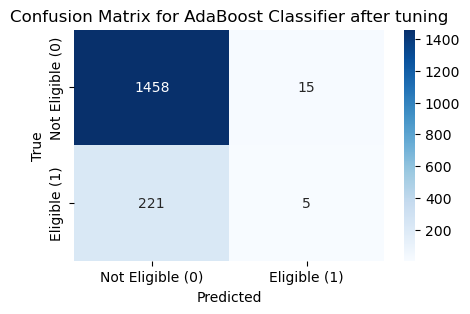

In [100]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for AdaBoost Classifier after tuning')
plt.show()

In [101]:
validation_score = clf_AB_hp.score(X_val, y_val)
print(f'Validation Set Accuracy: {validation_score}')

Validation Set Accuracy: 0.8572479764532744


In [102]:
y_val_preds = clf_AB_hp.predict(X_val)

print("Classification Report for AdaBoost Classifier Validation Set:")
print(classification_report(y_val, y_val_preds))

Classification Report for AdaBoost Classifier Validation Set:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1178
           1       0.07      0.01      0.01       181

    accuracy                           0.86      1359
   macro avg       0.47      0.50      0.47      1359
weighted avg       0.76      0.86      0.80      1359



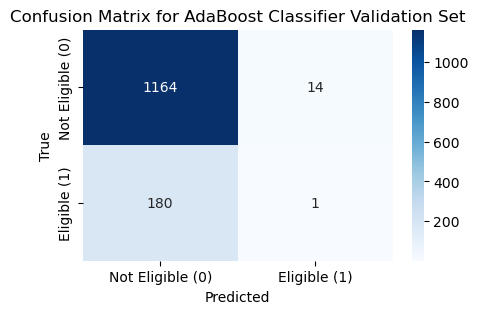

In [103]:
conf_mat = confusion_matrix(y_val, y_val_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible (0)', 'Eligible (1)'], 
            yticklabels=['Not Eligible (0)', 'Eligible (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for AdaBoost Classifier Validation Set')
plt.show()